# SURVIVED PASSENGERS

# Question Definition

## Define the Question

Perform K-Nearest Neighbours Classification to determine which passenger survived

## Context

No context provided on what the data is about, but from the data itself it seems there was an accident on a vehicle/boat carrying a large amount of passengers

## Metric of Success

- Perform Data cleaning
- Exploratory Data Analysis
- KNearest Neighbours 
- Model Optimization Techniques

# Reading the Data

In [161]:
# Load in the libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import Normalizer, StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# For distribution
from statsmodels.graphics.gofplots import qqplot

# For VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
# Load in the Data (Will work with the train dataset)
df = pd.read_csv('/Users/RyanMburu/Documents/DS-Projects/Supervised-Learning/week4-double-IP/Datasets/train (5).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
# Last 5 records
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [112]:
# Numner of features and records
df.shape

(891, 12)

In [113]:
# Check for datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Datatypes look OK, will proceed to cleaning

# Data Cleaning

## Dropping columns

In [114]:
# Drop Irrelevant Columns

# Will drop passenger ID, name, Ticket number and Cabin

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [115]:
# Preview new df
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


Decided to drop the mentioned columnns as I feel they will have no influence on our predictions

## Null Values

In [116]:
# Check null values
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [117]:
# Will drop the Null values with immediate effect
df = df.dropna()

df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

No more null values siiuu

## Duplicates

In [118]:
df.duplicated().sum()

38

In [119]:
df = df.drop_duplicates()

df.duplicated().sum()

0

No more duplicates in our data

## Outliers and Anomalies

In [120]:
# Will use boxplots to visuzlize outliers

# Will create a function that:

# 1. Displays outliers

def outlierz(column):
    fig = sns.boxplot(data=df, x=column)
    return fig


# 2. Handles outliers using the interqualtile approach
def iqr(column):

    global df

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)

    IQR = q3 - q1

    # Lower and upper limits
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR

    # Implement onto dataframe
    df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]

    return df.shape

# 3. Display new boxplot without outliers

<AxesSubplot:xlabel='Age'>

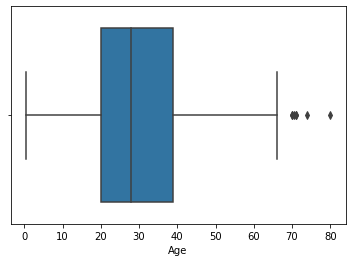

In [121]:
# Age 
outlierz('Age')

In [122]:
# Handle the outliers
iqr('Age')

(667, 8)

<AxesSubplot:xlabel='Age'>

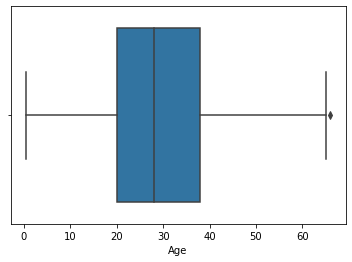

In [123]:
# New age column
outlierz('Age')

In [124]:
# Preview new clean DataFrame
df = df.reset_index()
df

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,22.0,1,0,7.2500,S
1,1,1,1,female,38.0,1,0,71.2833,C
2,2,1,3,female,26.0,0,0,7.9250,S
3,3,1,1,female,35.0,1,0,53.1000,S
4,4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
662,883,0,2,male,28.0,0,0,10.5000,S
663,885,0,3,female,39.0,0,5,29.1250,Q
664,887,1,1,female,19.0,0,0,30.0000,S
665,889,1,1,male,26.0,0,0,30.0000,C


* will not use the fare column in predictions but I left it as it will aid in EDA to understand more about the passengers onboard the Titanic

# Exploratory Data Analysis (EDA)

## Univariate Analysis

In [125]:
# Will use describe function to give us data such as mean, mode , standard dev and variance of continuous data we have

df['Age'].describe()

count    667.000000
mean      29.305727
std       14.098269
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       66.000000
Name: Age, dtype: float64

<Figure size 576x576 with 0 Axes>

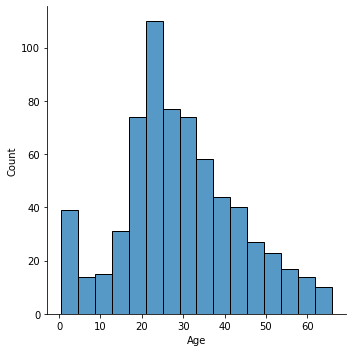

In [126]:
# Distribution
plt.figure(figsize=(8, 8))
sns.displot(data=df, x='Age')
plt.show()

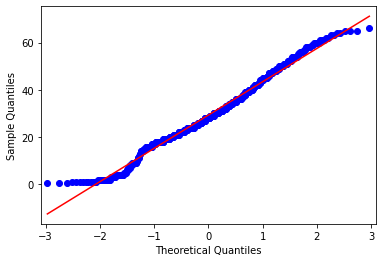

In [127]:
# Will use ggplot to see if its normally distributed
qqplot(df['Age'], line='s')
plt.show()

It is normally distributed

In [128]:
df['Fare'].describe()

count    667.000000
mean      35.778842
std       54.334037
min        0.000000
25%        8.050000
50%       16.100000
75%       34.375000
max      512.329200
Name: Fare, dtype: float64

The mean fare price is 35

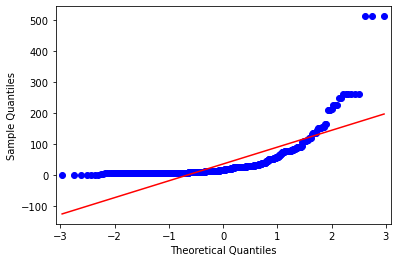

In [129]:
qqplot(df['Fare'], line='s')
plt.show()

The fare distributions is not normally distributed.

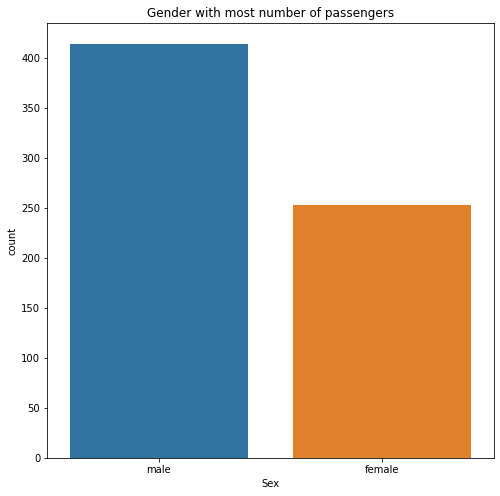

In [130]:
# Gender with most passengers

# Countplot will add up the number of occurrences

plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Sex')
plt.title('Gender with most number of passengers')
plt.show()

Most of the passengers onboard the titanic were male

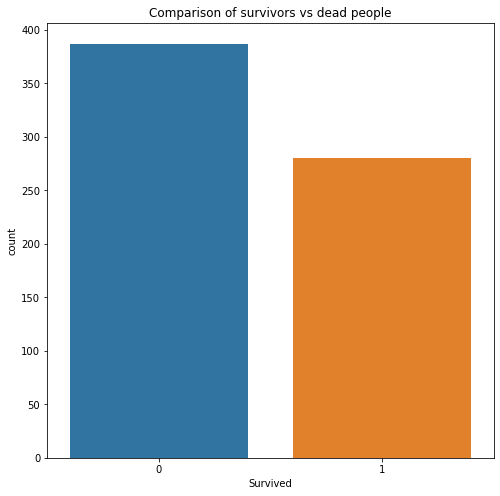

In [131]:
# Survivors
plt.figure(figsize=(8, 8))
sns.countplot(data=df, x='Survived')
plt.title('Comparison of survivors vs dead people')
plt.show()

More people died unfortunately

## Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Fare'>

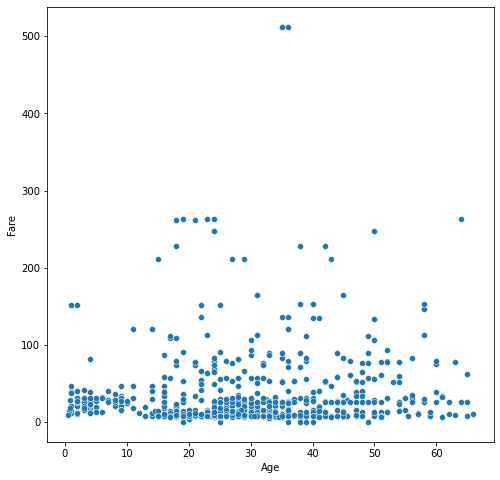

In [132]:
# Relationship between age of the passenger and the amount of fare paid
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='Age', y='Fare')

No observable relationship

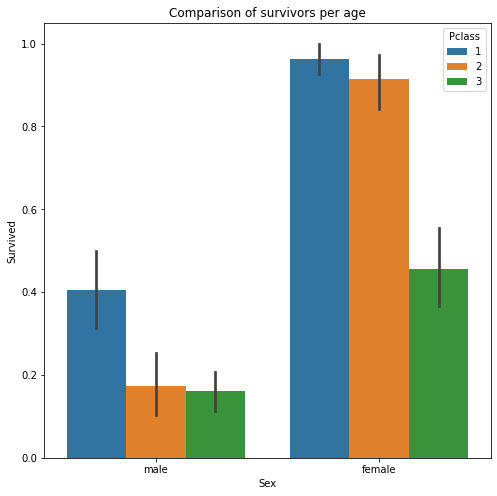

In [133]:
# Will compare the gendee which had most survivors

plt.figure(figsize=(8, 8))
sns.barplot(data=df, x='Sex', y='Survived', hue='Pclass')
plt.title('Comparison of survivors per age')
plt.show()

We can see more number of females survived over males

## Correlations

In [134]:
# Will see the correlations in our features

features = df[['Pclass', 'Age', 'SibSp', 'Parch']]
features.corr()

,Pclass,Age,SibSp,Parch
Pclass,1.000000,-0.363515,0.074216,0.031216
Age,-0.363515,1.000000,-0.315153,-0.190223
SibSp,0.074216,-0.315153,1.000000,0.372730
Parch,0.031216,-0.190223,0.372730,1.000000


<AxesSubplot:>

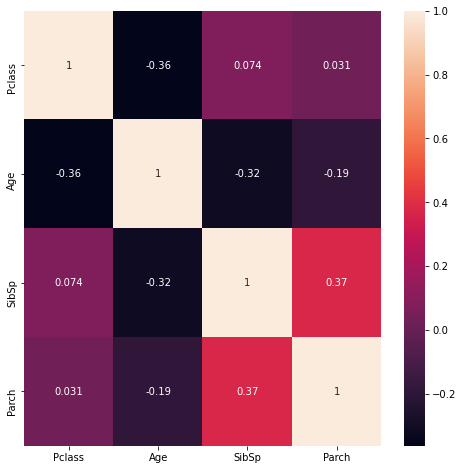

In [135]:
# Will vizualize this
plt.figure(figsize=(8, 8))
sns.heatmap(features.corr(), annot=True)

# Feature Selection

## Correlations using VIF scores

In [136]:
# Will check VIF Scores

def vif(df): 

  df_vif = pd.DataFrame()
  df_vif['feature'] = df.columns
  df_vif['VIF Score'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

  return df_vif

In [137]:
vif(features)

,feature,VIF Score
0,Pclass,3.174402
1,Age,2.661838
2,SibSp,1.553879
3,Parch,1.463860


VIF Scores are really low, so we will not drop anything

## Label Encoding

In [138]:
# Will perform label encoding on the categorical data

encoder = LabelEncoder()

df['Sex'] = encoder.fit_transform(df['Sex'])

In [139]:
# The same on the embarked column
df['Embarked'] = encoder.fit_transform(df['Embarked'])

In [140]:
df.drop(['index'], axis=1, inplace=True)

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
662,0,2,1,28.0,0,0,10.5000,2
663,0,3,0,39.0,0,5,29.1250,1
664,1,1,0,19.0,0,0,30.0000,2
665,1,1,1,26.0,0,0,30.0000,0


In [103]:
# Our dataframe is ready for modelling. Will save it separately

df.to_csv('Clean Titanic.csv')

# Modelling / ML

## Splitting

In [143]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']].values
y = df['Survived'].values

In [144]:
# Splitting into 80 - 20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## KNN

In [145]:
# Will perform KNN with n_neighbours set to 5 first then do some optimization later

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [152]:
# Check our model's accuracy and the confusion matrix

print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

print('\n*************************************************')

print('\nClassification Report : ', classification_report(y_test, y_pred))



Accuracy of our 80-20 model is :  0.6343283582089553

*************************************************

Confusion matrix :  [[57 16]
 [33 28]]

*************************************************

Classification Report :                precision    recall  f1-score   support

           0       0.63      0.78      0.70        73
           1       0.64      0.46      0.53        61

    accuracy                           0.63       134
   macro avg       0.63      0.62      0.62       134
weighted avg       0.63      0.63      0.62       134



Our Model's accuracy is 63%.

We will attempt to optimize it

### Normalization

In [157]:
# Normalize the dataset
normal = Normalizer()
X = normal.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run KNN again
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

print('\n*************************************************')

print('\nClassification Report : ', classification_report(y_test, y_pred))


Accuracy of our 80-20 model is :  0.7164179104477612

*************************************************

Confusion matrix :  [[60 13]
 [25 36]]

*************************************************

Classification Report :                precision    recall  f1-score   support

           0       0.71      0.82      0.76        73
           1       0.73      0.59      0.65        61

    accuracy                           0.72       134
   macro avg       0.72      0.71      0.71       134
weighted avg       0.72      0.72      0.71       134



After normalization, our accuracy jumped to 71.6% !!

In [158]:
# Lets Normalize and use it everywhere else
normal = Normalizer()
X = normal.fit_transform(X)

### Smoothing - > changing parameters withion the KNN model

In [170]:
# View parameters used in the previous model
knn.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [166]:
# WIll use GridSearch CV to get the best metric, n_neighbours and weights
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Specify parameters to specify for Gridsearch
params = { 'n_neighbors' : range(1,12),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
kfold = KFold(n_splits = 5, random_state = None)

grid= GridSearchCV(KNeighborsClassifier(), params, cv=kfold, n_jobs= -1)

grid.fit(X_train, y_train)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}

The best parameters to use are n_neighbours of 3 as the others are standard

In [172]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run KNN again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))


Accuracy of our 80-20 model is :  0.753731343283582

*************************************************

Confusion matrix :  [[61 12]
 [21 40]]


The model's accuracy has increased again to 75% as we got the best value for n_neighbours

## KNN with a sample split of 70 - 30

In [173]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run KNN again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))


Accuracy of our 80-20 model is :  0.7313432835820896

*************************************************

Confusion matrix :  [[95 18]
 [36 52]]


The accuracy reduced to 73%

## KNN with a sample split of 60 - 40

In [174]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Run KNN again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

Accuracy of our 80-20 model is :  0.7265917602996255

*************************************************

Confusion matrix :  [[128  27]
 [ 46  66]]


The accuracy reduced again to 72%, proving that an 80 - 20 split is the best

## Run best performing Model and Draw Conclusions

In [175]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run KNN again
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Check Accuracy
print('Accuracy of our 80-20 model is : ', accuracy_score(y_test, y_pred))

print('\n*************************************************')

print('\nConfusion matrix : ', confusion_matrix(y_test, y_pred))

Accuracy of our 80-20 model is :  0.753731343283582

*************************************************

Confusion matrix :  [[61 12]
 [21 40]]


Our best model, after rigorous cross validation and performance tuning, has a performance of 75%

Whis happens when we set our : 
-  n_neighbours to 3
- Metric to mirkowski
- Split in 80-20 format
- Normalize our data
- Check for correlation

Will use this model in the python script.